<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Practico_02_Dana_Angellotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 2

# Ejercicio 1

Vamos a trabajar con el dataset [titanic.csv](https://drive.google.com/file/d/1X0hJDYfmBfB88t1A1DeXzPc5c_a0-YVu/view?usp=share_link) desde Google Drive.

## Punto 1

Descargar y levantar el dataset

In [ ]:
# Se descarga el archivo a utilizar y se almacena en la carpeta content
!wget -O /content/titanic.csv "https://drive.google.com/uc?export=download&id=1X0hJDYfmBfB88t1A1DeXzPc5c_a0-YVu"

# Cargar el archivo CSV con pandas
import pandas as pd

df_titanic = pd.read_csv('titanic.csv')

# Mostrar las primeras filas del dataset para verificar que se cargó correctamente
df_titanic.head()

--2024-10-25 00:06:19--  https://drive.google.com/uc?export=download&id=1X0hJDYfmBfB88t1A1DeXzPc5c_a0-YVu
Resolving drive.google.com (drive.google.com)... 74.125.135.100, 74.125.135.101, 74.125.135.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1X0hJDYfmBfB88t1A1DeXzPc5c_a0-YVu&export=download [following]
--2024-10-25 00:06:19--  https://drive.usercontent.google.com/download?id=1X0hJDYfmBfB88t1A1DeXzPc5c_a0-YVu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘/content/titanic.csv’

/content/titanic.cs 100%[===================>]  59.76K  --.-K

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Punto 2

Mostrar por pantalla los nombres (columnas Name) ordenados alfabéticamente y segmentado por clase (columna Pclass) y numerados desde 0 para cada clase.

Ejemplo:

Clase x

0 nombre

1 nombre

...


Clase y

0 nombre

1 nombre

...

In [ ]:
# Agrupar por Pclass y ordenar los nombres alfabéticamente
for clase, grupo in df_titanic.groupby('Pclass'):
    print(f"\nClase {clase}")
    nombres_ordenados = grupo['Name'].sort_values().reset_index(drop=True)
    for idx, nombre in enumerate(nombres_ordenados):
        print(f"{idx} {nombre}")



Clase 1
0 Allen, Miss. Elisabeth Walton
1 Allison, Master. Hudson Trevor
2 Allison, Miss. Helen Loraine
3 Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
4 Anderson, Mr. Harry
5 Andrews, Miss. Kornelia Theodosia
6 Andrews, Mr. Thomas Jr
7 Appleton, Mrs. Edward Dale (Charlotte Lamson)
8 Artagaveytia, Mr. Ramon
9 Astor, Mrs. John Jacob (Madeleine Talmadge Force)
10 Aubart, Mme. Leontine Pauline
11 Barber, Miss. Ellen "Nellie"
12 Barkworth, Mr. Algernon Henry Wilson
13 Baumann, Mr. John D
14 Baxter, Mr. Quigg Edmond
15 Baxter, Mrs. James (Helene DeLaudeniere Chaput)
16 Bazzani, Miss. Albina
17 Beckwith, Mr. Richard Leonard
18 Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
19 Behr, Mr. Karl Howell
20 Bidois, Miss. Rosalie
21 Bishop, Mr. Dickinson H
22 Bishop, Mrs. Dickinson H (Helen Walton)
23 Bissette, Miss. Amelia
24 Bjornstrom-Steffansson, Mr. Mauritz Hakan
25 Blackwell, Mr. Stephen Weart
26 Blank, Mr. Henry
27 Bonnell, Miss. Elizabeth
28 Bowerman, Miss. Elsie Edith
29 Bradley, Mr. G


## Punto 3

Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron  (columna Survived).

El valor 1 indica que está sobrevivio y 0 no.


In [ ]:
# Calcular el porcentaje de personas que sobrevivieron y murieron
survival_counts = df_titanic['Survived'].value_counts(normalize=True) * 100
print(f"Porcentaje de personas que sobrevivieron: {survival_counts[1]:.2f}%")
print(f"Porcentaje de personas que murieron: {survival_counts[0]:.2f}%")


Porcentaje de personas que sobrevivieron: 38.38%
Porcentaje de personas que murieron: 61.62%


## Punto 4

Mostrar por pantalla el porcentaje de personas que sobrevivieron (columna Survived) en cada clase (columna Pclass).

El valor 1 indica que sobrevivio y 0 no.

In [ ]:
# Calcular el porcentaje de personas que sobrevivieron en cada clase (Pclass)
for clase, grupo in df_titanic.groupby('Pclass'):
    survival_rate = grupo['Survived'].mean() * 100
    print(f"Porcentaje de supervivientes en la Clase {clase}: {survival_rate:.2f}%")


Porcentaje de supervivientes en la Clase 1: 62.96%
Porcentaje de supervivientes en la Clase 2: 47.28%
Porcentaje de supervivientes en la Clase 3: 24.24%


## Punto 5

Realizar un gráfico de barras horizontal con la cantidad de personas según la edad (columna Age). La franja es de 10 años, es decir, 0-9, 10-19, ..., 90-99.

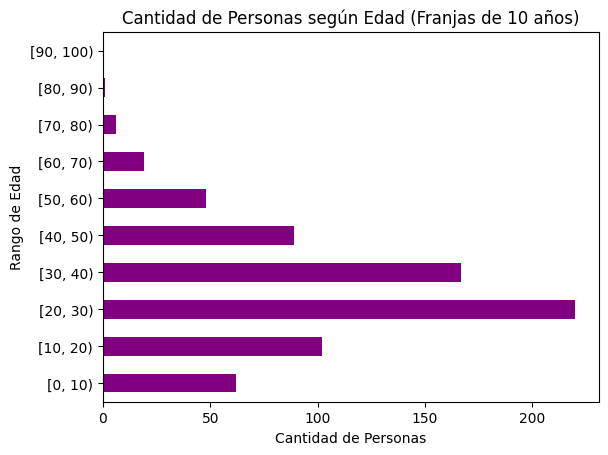

In [ ]:
import matplotlib.pyplot as plt

# Crear las franjas de edad (0-9, 10-19, ..., 90-99)
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=range(0, 101, 10), right=False)

# Contar el número de personas en cada franja de edad
age_group_counts = df_titanic['AgeGroup'].value_counts().sort_index()

# Crear el gráfico de barras horizontal
age_group_counts.plot(kind='barh', color='purple')
plt.xlabel('Cantidad de Personas')
plt.ylabel('Rango de Edad')
plt.title('Cantidad de Personas según Edad (Franjas de 10 años)')
plt.show()

# Ejercicio 2

Vamos a trabajar con el dataset [df_total.csv](https://drive.google.com/file/d/1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc/view?usp=share_link) desde Google Drive.


## Punto 1

Descargar y levantar el dataset

In [ ]:
# Se descarga el archivo a utilizar y se almacena en la carpeta content
!wget -O /content/df_total.csv "https://drive.google.com/uc?export=download&id=1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc"

--2024-10-25 00:06:24--  https://drive.google.com/uc?export=download&id=1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc
Resolving drive.google.com (drive.google.com)... 74.125.135.100, 74.125.135.101, 74.125.135.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc&export=download [following]
--2024-10-25 00:06:25--  https://drive.usercontent.google.com/download?id=1lQv5L0uF7Gu4miEiQaxEMP2JHDLPHKIc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4068473 (3.9M) [application/octet-stream]
Saving to: ‘/content/df_total.csv’

/content/df_total.c 100%[===================>]   3.88M  -

In [ ]:
# Se carga el Dataframe y se muestra la informacion basica del mismo
df = pd.read_csv('/content/df_total.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.6+ KB


,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


## Punto 2

Crear un columna `person` y completarla con la búsqueda de la  entidad persona dentro de la columna `news`. La entidad persona es un nombre y apellido.

Tiene que ser una aproximación. No va a ser perfecta por falta de contexto.

In [ ]:
import re

# Definir una expresión regular básica para encontrar nombres y apellidos
def find_person(text):
    # Busca dos palabras que comiencen con mayúscula (una aproximación simple)
    match = re.findall(r'[A-Z][a-z]+ [A-Z][a-z]+', text)
    return ', '.join(match) if match else None

# Aplicar la función a la columna 'news' para crear la columna 'person'
df['person'] = df['news'].apply(find_person)

# Mostrar las primeras filas con la nueva columna
df[['news', 'person']].head()

,news,person
0,Durante el foro La banca articulador empresari...,"Colombia Andr, Para Garc"
1,El regulador de valores de China dijo el domin...,"La Comisi, Estados Unidos, Didi Global, Nueva ..."
2,En una industria históricamente masculina como...,"Desde Francia, Go Pink, En Viva, Florida Nueva..."
3,Con el dato de marzo el IPC interanual encaden...,"La Mancha, La Rioja, Comunidad Valenciana, Con..."
4,Ayer en Cartagena se dio inicio a la versión n...,"Gustavo Petro, Mario Pardo, Junta Directiva, B..."


## Punto 3

Crear un columna `domain` y completarla con el dominio del sitio dentro de la columna `url`. Un dominio es `larepublica.co`.

In [ ]:
from urllib.parse import urlparse

# Función para extraer el dominio del sitio
def extract_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return None

# Aplicar la función para crear la columna 'domain'
df['domain'] = df['url'].apply(extract_domain)

# Mostrar las primeras filas con la nueva columna
df[['url', 'domain']].head()

,url,domain
0,https://www.larepublica.co/redirect/post/3201905,www.larepublica.co
1,https://www.larepublica.co/redirect/post/3210288,www.larepublica.co
2,https://www.larepublica.co/redirect/post/3240676,www.larepublica.co
3,https://www.larepublica.co/redirect/post/3342889,www.larepublica.co
4,https://www.larepublica.co/redirect/post/3427208,www.larepublica.co


## Punto 4

Crear una columna llamada `words` y contabilizar la cantidad de palabras que hay en la columna `news`.

In [ ]:

# Crear la columna 'words' con la cantidad de palabras en la columna 'news'
df['words'] = df['news'].apply(lambda x: len(str(x).split()))

# Mostrar las primeras filas con la nueva columna
df[['news', 'words']].head()

,news,words
0,Durante el foro La banca articulador empresari...,221
1,El regulador de valores de China dijo el domin...,342
2,En una industria históricamente masculina como...,367
3,Con el dato de marzo el IPC interanual encaden...,477
4,Ayer en Cartagena se dio inicio a la versión n...,793


## Punto 5

Realizar un gráfico de barras donde muestre la cantidad de noticias por tipo (columna Type).

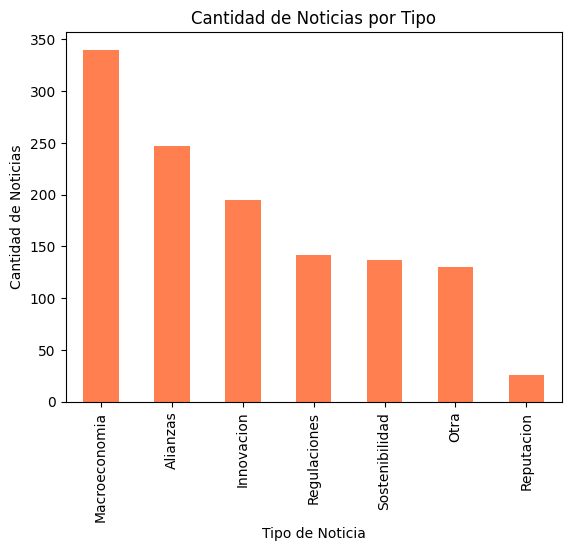

In [ ]:
# Contar la cantidad de noticias por tipo (columna 'Type')
type_counts = df['Type'].value_counts()

# Crear el gráfico de barras
type_counts.plot(kind='bar', color='coral')
plt.xlabel('Tipo de Noticia')
plt.ylabel('Cantidad de Noticias')
plt.title('Cantidad de Noticias por Tipo')
plt.show()